#### Module 6- Data Binning
author: Radley Rigonan

Data Binning is a broad data-processing technique in which data sets are placed into groups known as "bins".  It is known by other names bucketing, discretization, data chopping, and many others.  Data Binning is applicable in a variety of situations such as histograms, processes in which you breakdown data by demographics, and processes that summarize large sets of data.  However, while it is a very popular are useful technique, it also has its fair share of problems.  The following example demonstrates pros and cons of binning:

In [6]:
%matplotlib inline
import csv
import io
import urllib.request            
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

url = 'http://radwatch.berkeley.edu/sites/default/files/dosenet/etch_roof.csv' 
response = urllib.request.urlopen(url)
reader = csv.reader(io.TextIOWrapper(response)) 
timedata = []
counts = []
CPMerror = []
line = 0

for row in reader:
    if line != 0:
        timedata.append(datetime.fromtimestamp(float(row[2],)))
            # 3rd column if CSV is a UNIX timestamp that can be converted to datetime via fromtimestamp
        counts.append(float(row[6]))
        CPMerror.append(float(row[7]))
    line += 1

For this example, I will bin DoseNet data from our device on the Etcheverry Roof and average the data.  Afterwards, I will plot the data to show the consequences of data binning.  While I perform this technique with my own code, it is important to note that there are many built-in functions within Python and plenty of examples of data binning you can find online.

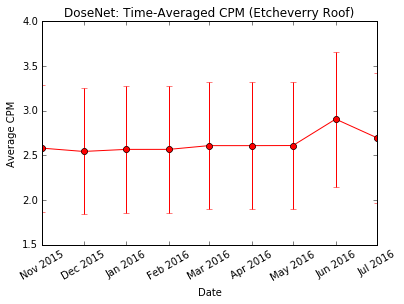

In [9]:
def month_bin():
    # First, we initialize important values.
    Year = [timedata[-1].year]
    Month = [timedata[-1].month]
    sumCPM = [0]                          # because mean = sum/total, we can just add CPM values as we iterate along the month
    sumError = [0]
    DataCount = [0]                       # variable to count total number of points per month
    bin_num = 0                           # variable to track current month; also tracks number of bins
    for i in range(len(counts)-1,0,-1):   # iterate from last point to first point on CSV in steps of -1
        if Year[bin_num] == timedata[i].year:        # if current bin year is same as iterated year
            if Month[bin_num] == timedata[i].month:  # if current bin month is same as iterated month, they belong in same bin!
                sumCPM[bin_num] += counts[i]
                sumError[bin_num] += CPMerror[i]     # so we collect the data we need...
                DataCount[bin_num] += 1
            else:                                    
                Year.append(timedata[i].year)        # if the months don't match:
                Month.append(timedata[i].month)      
                sumCPM.append(0)                     # add another bin by appending 0 and increasing bin_num
                sumError.append(0)
                DataCount.append(0)
                bin_num += 1
        else:                                        # if current bin year doesn't match iterated year: 
            Year.append(timedata[i].year)
            Month.append(timedata[i].month)          # add another bin by appending 0 and increasing bin_num
            sumCPM.append(0)
            sumError.append(0)
            DataCount.append(0)
            bin_num += 1
    
    binnedCPM = np.array(sumCPM) / np.array(DataCount)              # np.array allows us to perform element-by-elemtent division
    binnedError = np.array(sumError) / np.array(DataCount)
    
    strDates = [str(m)+'-'+str(n) for m,n in zip(Month,Year)]       # convert Month Year values into string values for datetime
    binnedDates = []
    for i in range(0,len(Month)):
        binnedDates.append(datetime.strptime(strDates[i],'%m-%Y'))  # now everything is in the proper format!
        
    fig, ax = plt.subplots()
    ax.plot(binnedDates,binnedCPM, 'ro-')
    ax.errorbar(binnedDates,binnedCPM, yerr=binnedError, fmt='ro', ecolor='r')
    plt.xticks(rotation=30)
    plt.title('DoseNet: Time-Averaged CPM (Etcheverry Roof)')
    plt.xlabel('Date')
    plt.ylabel('Average CPM')

month_bin()

Data binning has enabled us to create a plot with that accurately summarizes general trends of data.  From around 100,000 data points, we were able to condense it into significantly less.  Simultaneously, data binning is a processing technique, meaning the data has been transformed.  We have lost a significant amount of precision and accuracy in our data and interesting points of interest (such as minimums and maximums) have been destroyed.  Thus, data binning is only an introductory pre-processing technique.  Later on, we will examine other processing techniques that reduce the effects of data destruction.

For the above code, it is completely fine if it is difficult for you to follow each and every command.  At its core, scripts are composed of logical statements and programming syntax.  It takes time to familiarize yourself with the syntax, and afterwards, you still need to wrap your head around the programmatic logic.